# Breast Cancer Wisconsin - Dataset Analysis<br>
In this section, our project team had confirmed the clean status of the dataset acquired.<br>
The analysis included 


In [3]:
%matplotlib inline 
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [4]:
# Read the dataset downloaded from provided link and stored in the 'data' directory in the git repository.
# The dataset is the Breast Cancer Wisconsin (Diagnostic) Data Set from UCI Machine Learning Repository

data = pd.read_csv('../data/wdbc.data', header=None)
# Display the shape of the dataset
print(f"The dataset has {data.shape[0]} rows (cases), and {data.shape[1]} columns, inlcuding ID and diagnosis.")

# Display the original column names, these are not the variable names, they are just numerical indices
print(f"The dataset column names in the original dataset form:")
print(data.columns)

The dataset has 569 rows (cases), and 32 columns, inlcuding ID and diagnosis.
The dataset column names in the original dataset form:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')


In [5]:
# The names of columns in the dataset are not descriptive, so we will assign more meaningful variable names.
# These names are based on the dataset's description and should match the number of columns in the dataframe
# The dataset contains 32 columns, including the ID, diagnosis, and various features

# Define the variable names for the dataset
vname  = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Assign the variable names to the dataframe
# This step is crucial for making the dataset more interpretable
data.columns = vname

# Verify the change of the variable names
data.columns.tolist()
 

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [6]:
# Display the information about the dataset
# This includes the data types of each column and the number of non-null entries
print(data.info())

# Display the first two and last two rows of the dataset
print(data.head(2))
print(data.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

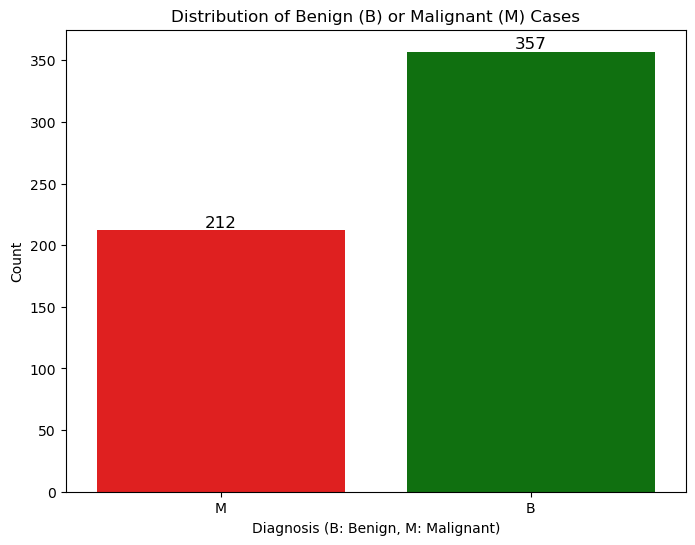

In [7]:
# Display the count of cases identified as benign or malignant based on the 'diagnosis' column
# This is a crucial step in understanding the distribution of cases in the dataset
# We use seaborn's countplot to visualize the distribution. We also define a custom color palette for better visualization.

# Create the countplot
plt.figure(figsize=(8, 6))
# Define a custom color palette for the diagnosis categories
# 'B' (Benign) is represented in green and 'M' (Malignant) in red
custom_palette = {'B': 'green', 'M': 'red'}
sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette=custom_palette)

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()), 
             ha='center', va='bottom', fontsize=12, color='black')

# Set the labels and title for the plot    
plt.xlabel('Diagnosis (B: Benign, M: Malignant)')
plt.ylabel('Count')
plt.title('Distribution of Benign (B) or Malignant (M) Cases')
plt.show()

In [8]:
# This code is to check on any missing values from all columns in the dataset
# It is important to ensure that the dataset is clean and ready for analysis
# Display the count of null values in each column
# This will help identify any columns that may need cleaning or imputation

print("Count of null values in each column:")  
print(data.isnull().sum())

Count of null values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [9]:
# Display the descriptive statistics of the dataset
# This provides insights into the distribution of values in each column
# We focus on the columns from index 2 to 11, which contain the numerical features. We exclude the 'id' and 'diagnosis' columns.

print(data.iloc[:, 2:12].describe().round(2)) # Numberical features summary statistics is rounded to 2 decimal places for better readability

       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.05            0.08   

In [10]:
# Use the hotkey encoding to convert the 'diagnosis' column into a binary format
# 'M' (Malignant) is mapped to 1 and 'B' (Benign) is mapped to 0
# This step is essential for preparing the dataset for machine learning

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [11]:
# DO WE NEED THIS CODE SINCE WE ALREADY PLOTTED THE COUNT.
# Here we are just checking if the recoding is as expected
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

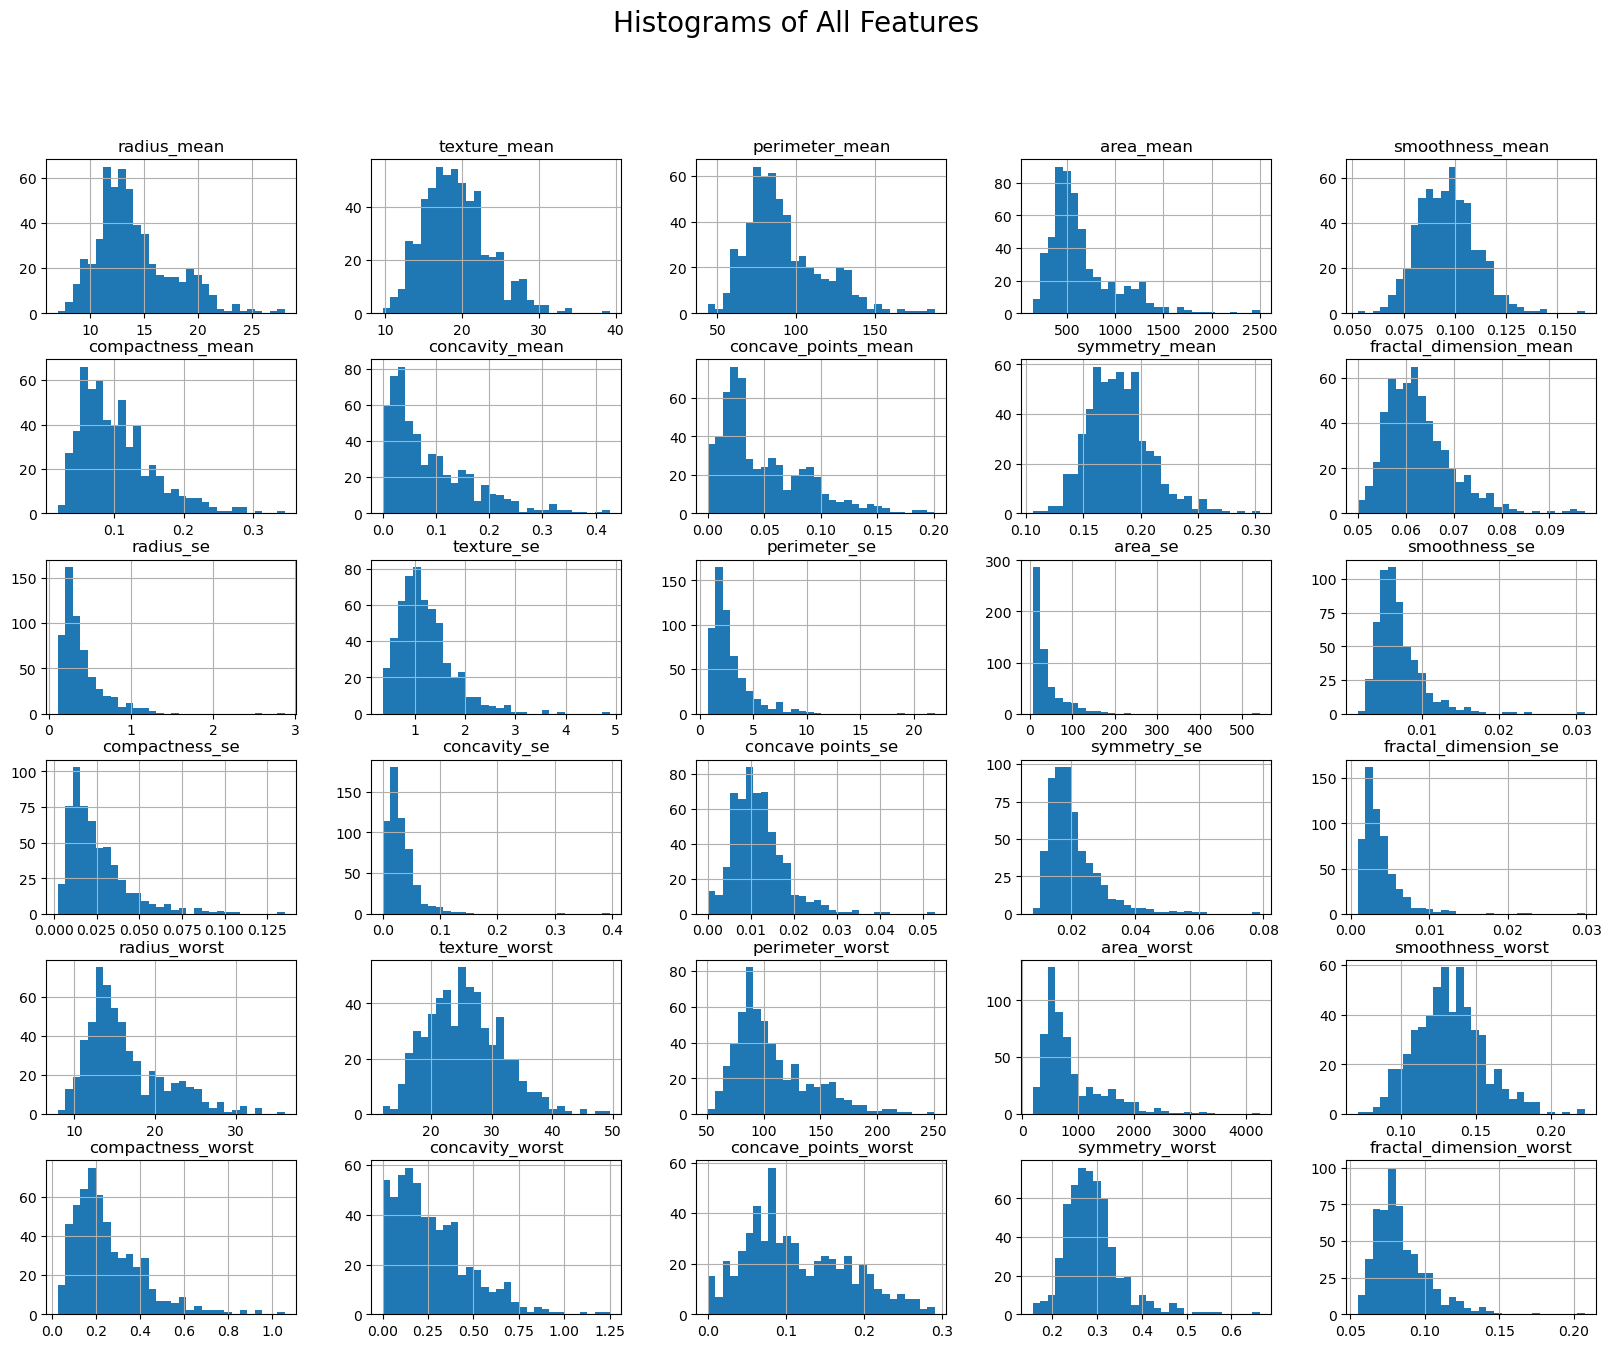

In [12]:
# Distribution of features
# This code generates histograms for all features in the dataset
# It helps visualize the distribution of each feature, which is important for understanding the data before modeling
# We drop the 'id' and 'diagnosis' columns as they are not features but identifiers or labels
# The histograms will be displayed in a grid format for better visualization

# Generate histograms for all features except 'id' and 'diagnosis'
data.drop(['id', 'diagnosis'], axis=1).hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()

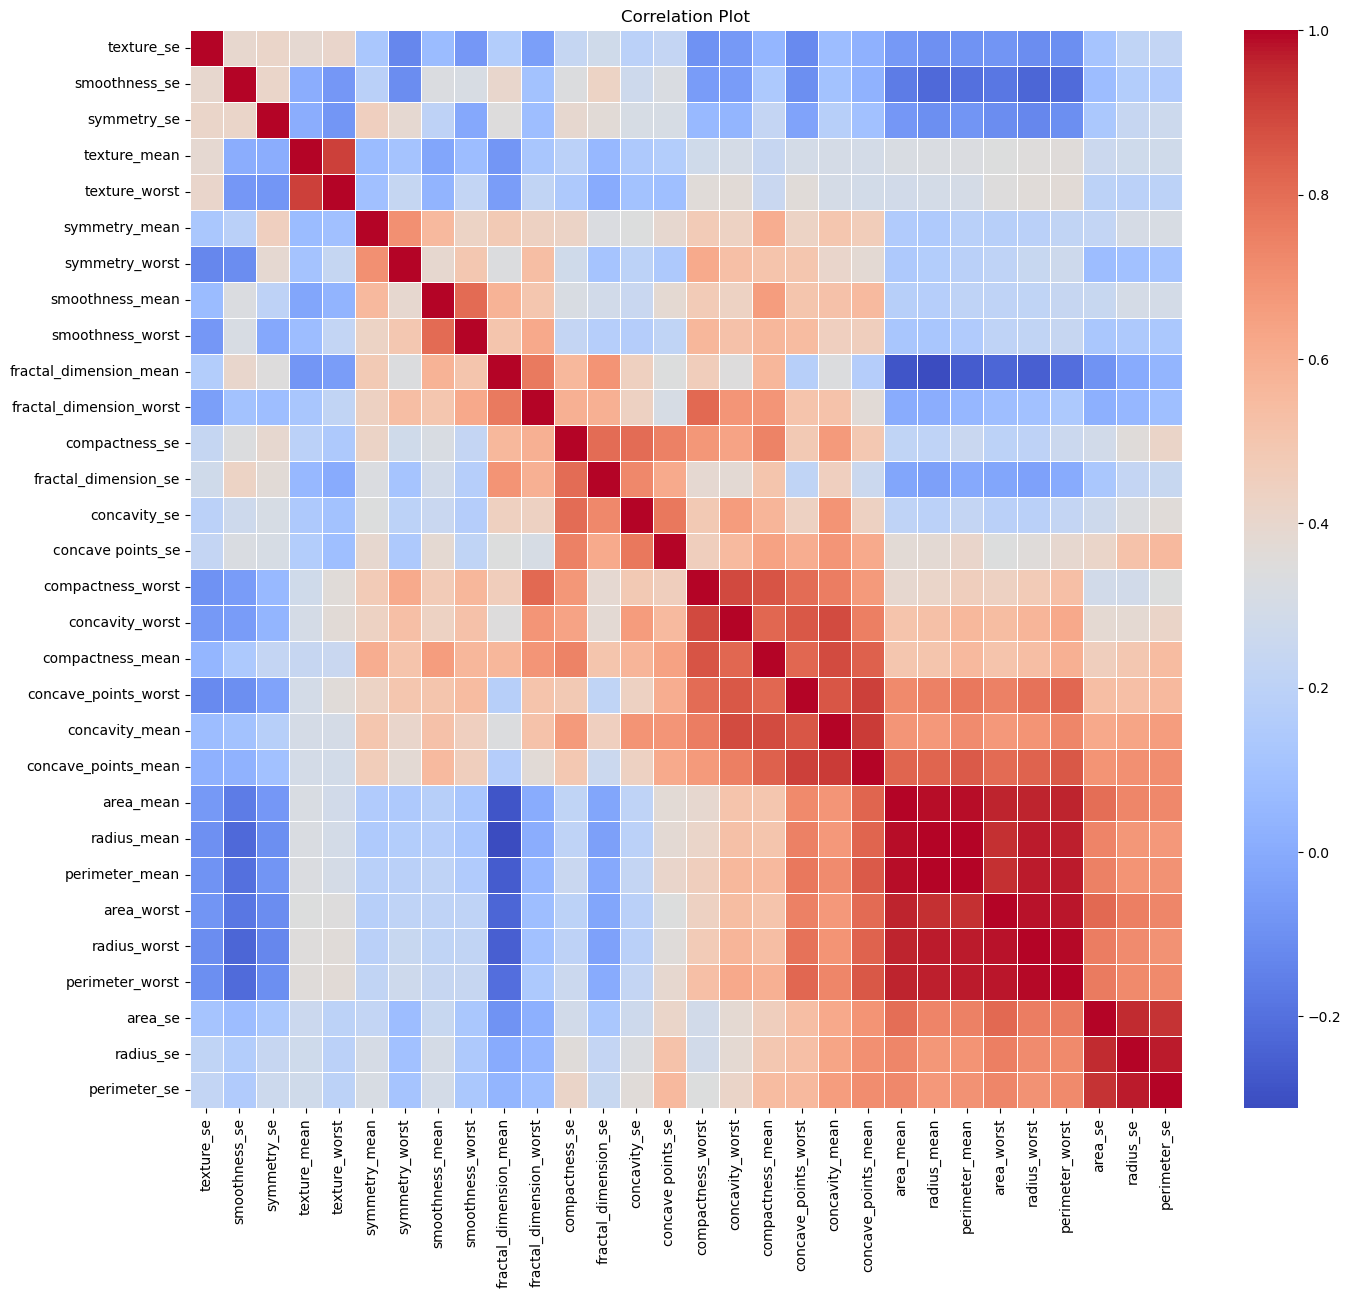

In [13]:
# Create a correlation plot between features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
# Compute the correlation matrix
# We drop the 'id' and 'diagnosis' columns as they are not features but identifiers or labels
# The correlation matrix will help us understand the relationships between different features

# Compute correlation matrix
df_corr = data.drop(columns=['id', 'diagnosis']).corr()

# Compute the linkage matrix for hierarchical clustering
# Convert correlation to distance
dist = 1 - df_corr.abs()
linkage_matrix = linkage(squareform(dist), method='average')

# Get the order of variables
ordered_indices = leaves_list(linkage_matrix)
ordered_columns = df_corr.columns[ordered_indices]


# Reorder the correlation matrix based on the hierarchical clustering
# This will help visualize the relationships between features more clearly
df_corr_reordered = df_corr.loc[ordered_columns, ordered_columns]

# Plot the heatmap 
plt.figure(figsize=(16, 14))
sns.heatmap(df_corr_reordered, 
            #annot=True, 
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot') # Showing the title of the plot
plt.show()

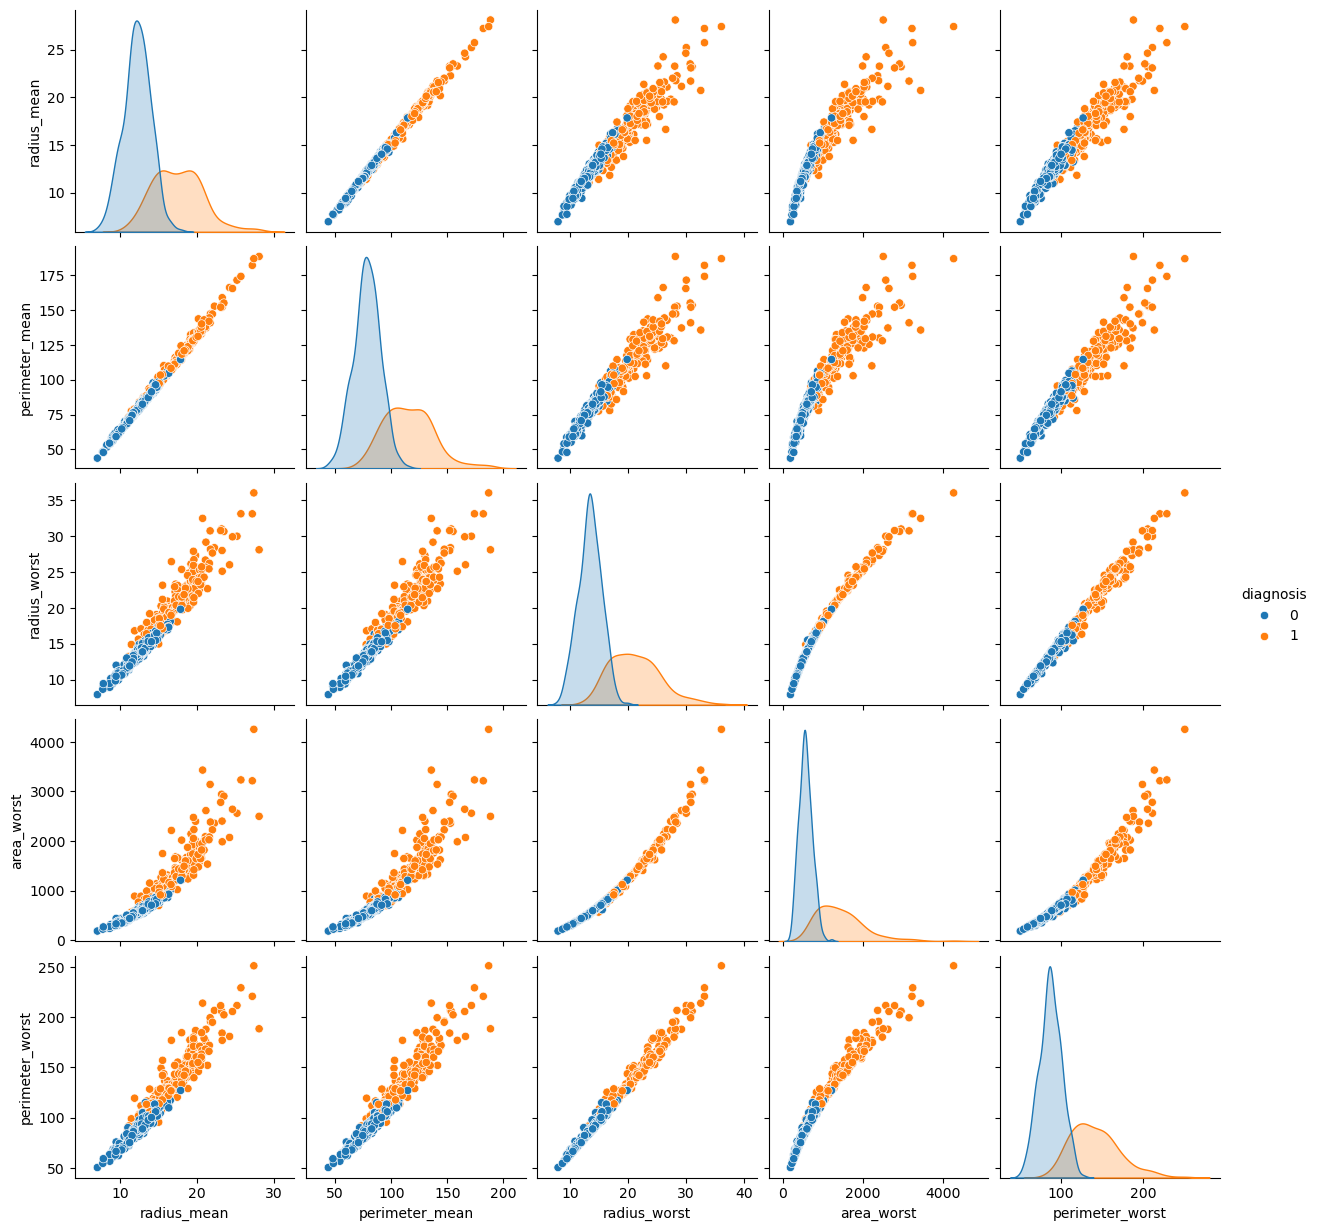

In [14]:
# Correlation plots between features by colour coded by diagnosis.
# This code generates pair plots for the top features in the dataset, colored by the 'diagnosis' column
# Pair plots are useful for visualizing the relationships between multiple variables in a dataset
# We select the top 5 features based on their correlation with the 'diagnosis' column
# We can use the absolute values of the correlation to determine the top features
correlation = df_corr['area_mean'].abs().sort_values(ascending=False)

# Select the top features excluding 'diagnosis'
# We use the top 5 features for the pair plot to avoid cluttering the visualization
top_features = correlation.index[1:6]  
sns.pairplot(data[top_features.tolist() + ['diagnosis']], hue='diagnosis')
plt.show()


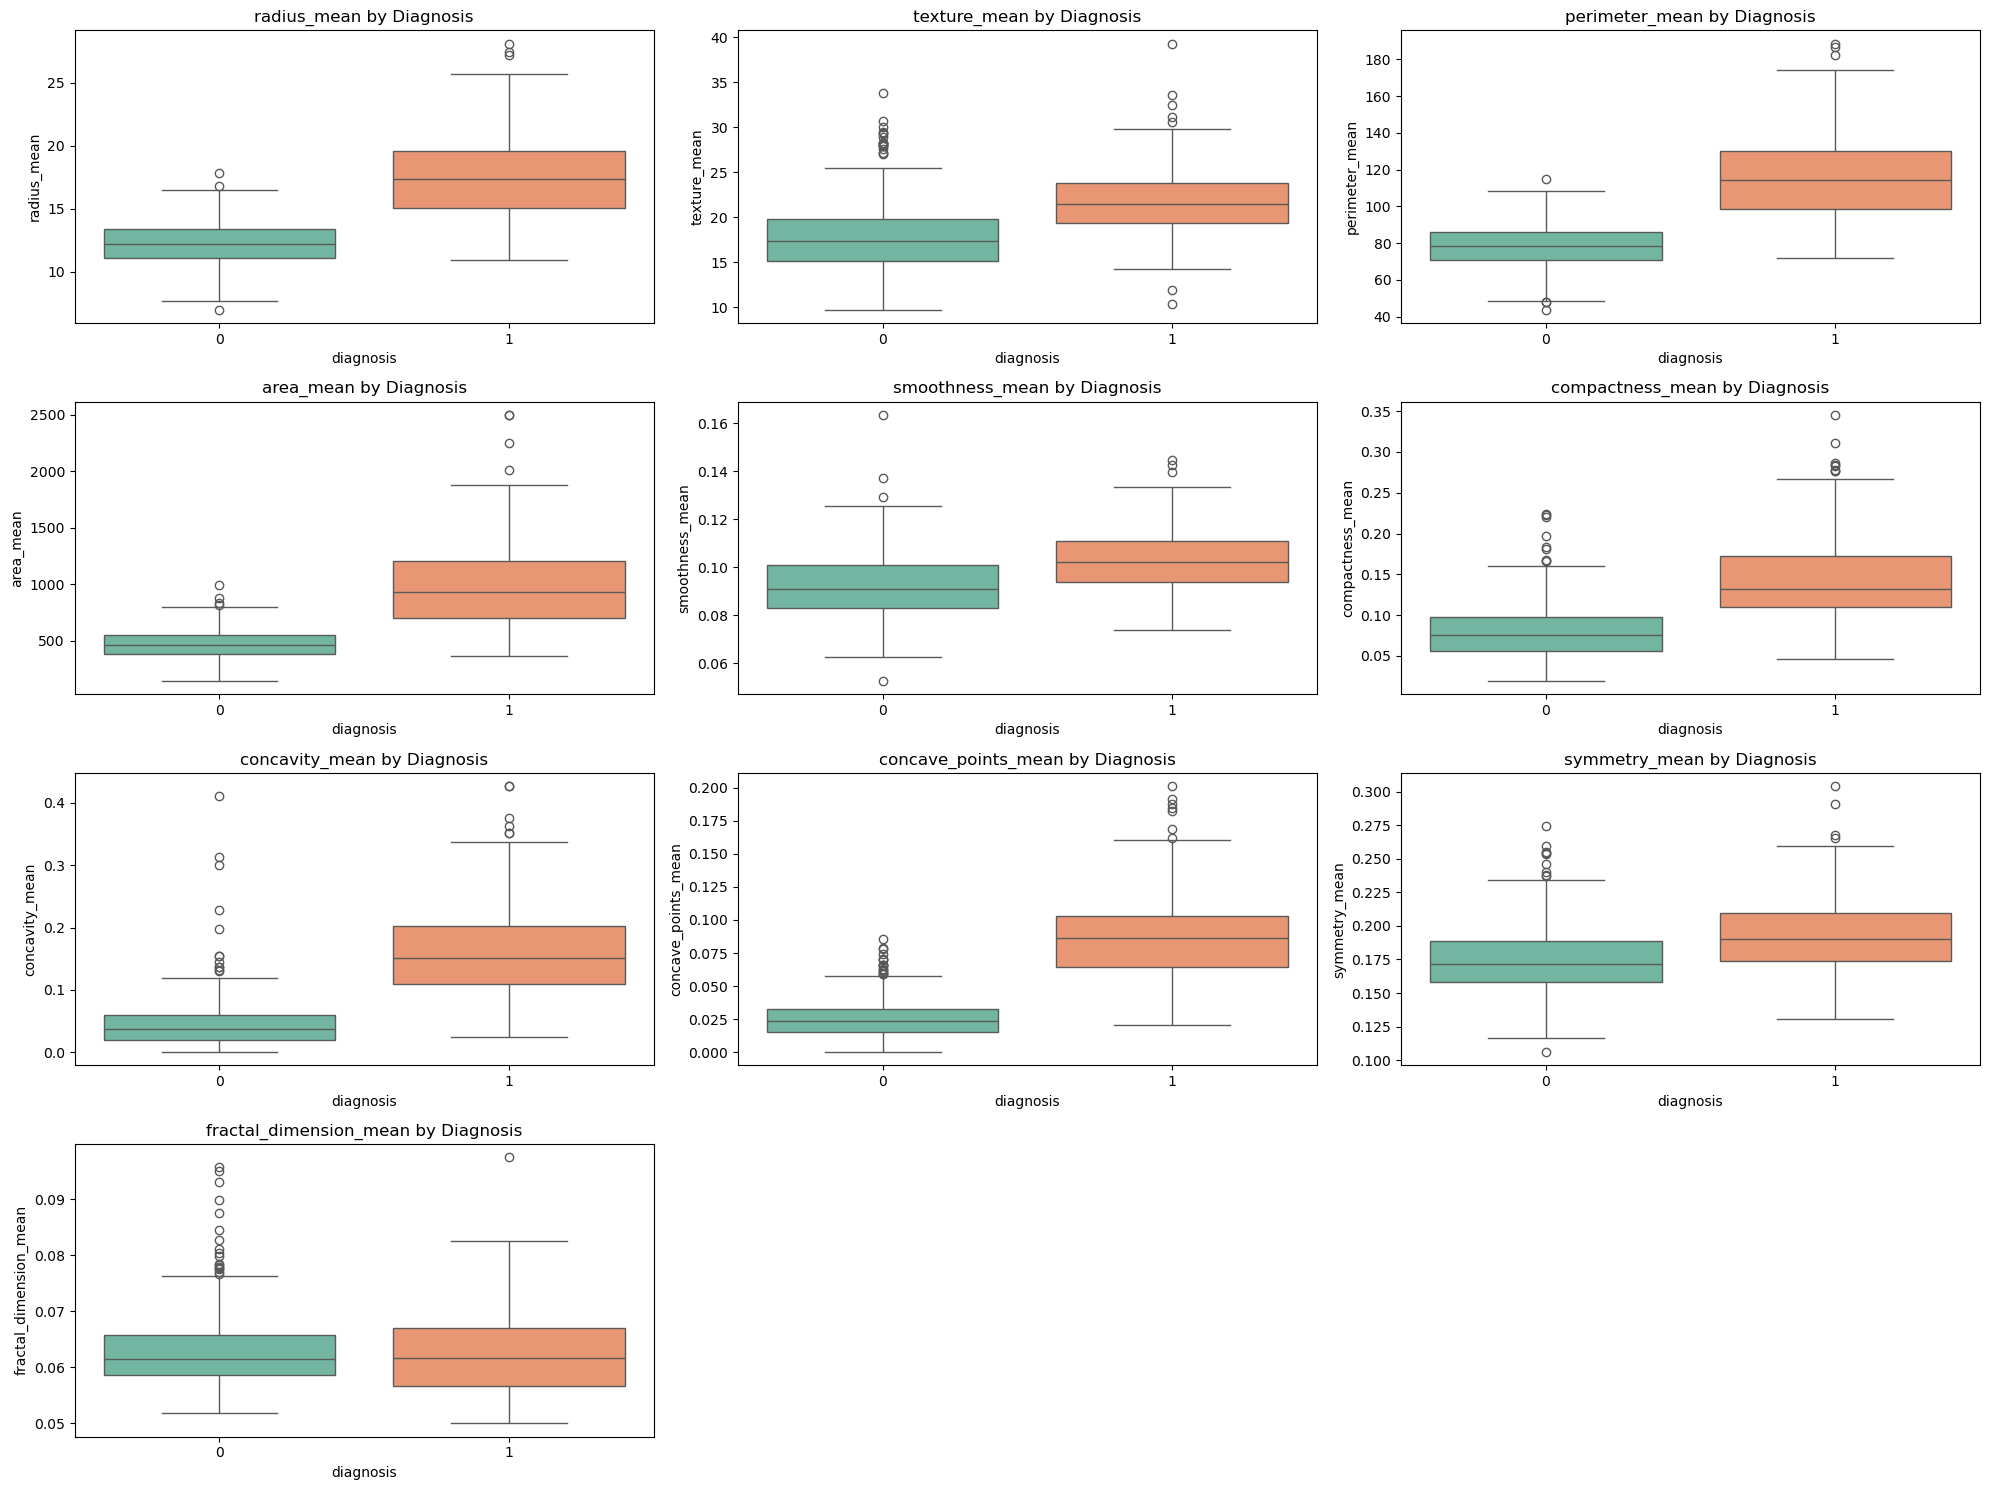

In [15]:
# Create boxplots for mean features by diagnosis
# This code generates boxplots for the mean features in the dataset, grouped by the 'diagnosis' column
# Boxplots are useful for visualizing the distribution of a feature across different categories
# We will create boxplots for all features that contain 'mean' in their name, as these represent the mean values of various measurements
# We will use seaborn's boxplot function to create the visualizations

mean_features = [col for col in data.columns if '_mean' in col]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(mean_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

In [16]:
# Remove the 'id' column for correlation analysis
# This is necessary as the 'id' column does not contain any useful information for correlation analysis
# We will compute the correlation coefficients between the features and the 'diagnosis' column
corr_with_diagnosis = data.drop(columns='id').corr()


In [17]:
# Display the correlation coefficients with diagnosis
# This will help us understand which features are most strongly correlated with the diagnosis
# We round the correlation values to two decimal places for better readability
corr_with_diagnosis.round(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


In [18]:
## Some of the features are highly correlated, and keeping them in the analysis 
## might create multicollinearity and other issues in the downstream analysis. 
## filter out features with correlation coeff of > 0.90


feature_data = data.drop(['id', 'diagnosis'], axis=1)
corr_matrix = feature_data.corr().abs()

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Highly correlated features to drop (corr > 0.90):")
print(to_drop)

# create new set to save the dataset
data2 = data.copy()

# drop those features from your dataset
data = data.drop(columns=to_drop)

# confirm final shape
print(f"\nOriginal shape: {data2.shape}")
print(f"Filtered shape: {data.shape}")

Highly correlated features to drop (corr > 0.90):
['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']

Original shape: (569, 32)
Filtered shape: (569, 22)


In [19]:
data.shape
# data.head
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  smoothness_se            569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se        5

# Models Development & Training<br>
In this section, our team is setting up the models for classification, training ML models on the dataset, and comparing models' accuracy on predicting the diagnosis. 

In [20]:
# Import necessary libraries for model development and training
# These libraries will be used for splitting the dataset, training models, and evaluating their performance
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score

## Dataset Preparation for Training & Testing<br>
Now our code will prepare the dataset by splitting it into training and testing sets. This procedure will ensure the dataset readiness to be feed into our chosen machine learning models.

In [21]:
# Prepare data for train/test split
# adjust the split ratio later/as per ..

X = data.drop(columns=['id', 'diagnosis']) # The features are all columns except 'id' and 'diagnosis'
# 'id' is an identifier and 'diagnosis' is the target variable we want to predict
# The features include various measurements related to breast cancer, such as radius, texture, perimeter, area, etc.


y = data['diagnosis'] # The target variable is 'diagnosis', which indicates whether the case is benign or malignant

# Split the dataset into training and testing sets
# This is a crucial step in machine learning to evaluate the model's performance on unseen data
# 20% of dataset is used for testing, and the random state is set for reproducibility. 
# Number 42 is a popular choice due to The Hitchhiker's Guide to the Galaxy ultimate answer to life, the universe, and everything.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Display the shapes of the training and testing datasets
# This will help us understand the size of the datasets we are working with

print(f"The shape of the training data: {X_train.shape}")
print(f"The shape of the testing data: {X_test.shape}")
print(f"The shape of the training target (diagnosis): {y_train.shape}")
print(f"The shape of the testing target (diagnosis): {y_test.shape}")


The shape of the training data: (455, 20)
The shape of the testing data: (114, 20)
The shape of the training target (diagnosis): (455,)
The shape of the testing target (diagnosis): (114,)


### Model #1 - Logistic Regression<br>
Logistic Regression is the basic model to be training, validated and testing using the previously prepared dataset.

Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



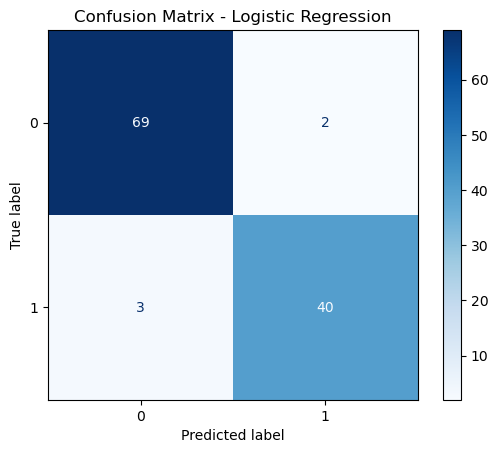

In [22]:
# Logistic Regression fitting and prediction
# We will use the LogisticRegression class from sklearn.linear_model to create the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a Logistic Regression model with a maximum of 1000 iterations for convergence
# The max_iter parameter is set to ensure that the model has enough iterations to converge
lr = LogisticRegression(max_iter=1000)


# Fit the Logistic Regression model to the training data
lr.fit(X_train, y_train)


# Predict the labels for the test set using the trained model
# This step is essential to evaluate the model's performance on unseen data
# The predict method will return the predicted labels for the test set
y_pred_lr = lr.predict(X_test)

# Display the performance of the Logistic Regression model
# We will use the classification_report function from sklearn.metrics to evaluate the model's performance
print("Logistic Regression performance:")
print(classification_report(y_test, y_pred_lr))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

## Model #2 - Random Forest Model (RFM)<br>
Random Forest Model is our second model of choice to be trained and tested on the same dataset split mentioned in our previous section.

Random Forest performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



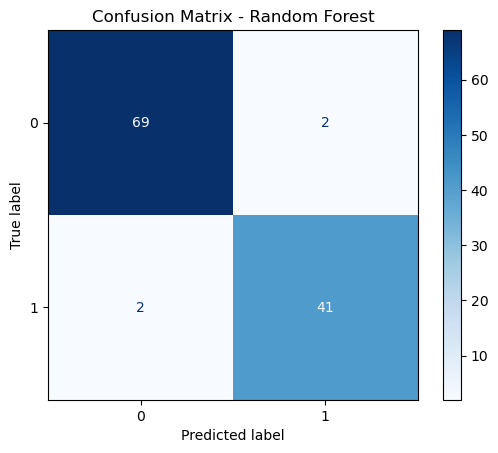

In [23]:
# Random Forest fitting and prediction
# Random Forest Model is our second model of choice to be trained and tested on the same dataset split mentioned in our previous section.
# We will use the RandomForestClassifier class from sklearn.ensemble to create the model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with a random state for reproducibility
# The random_state parameter ensures that the results are consistent across runs
rf = RandomForestClassifier(random_state=42)

# Fit the Random Forest model to the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data using the trained Random Forest model
# This will give us the predicted labels for the test set, which we can then compare with the true labels
# The predictions will be used to evaluate the model's performance
y_pred_rf = rf.predict(X_test)

print("Random Forest performance:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

## Model #3 - Support Vector Machine (SVM)<br>
In this section, our thrid and last ML model is trained and tested using the dataset.


Support Vector Machine performance:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



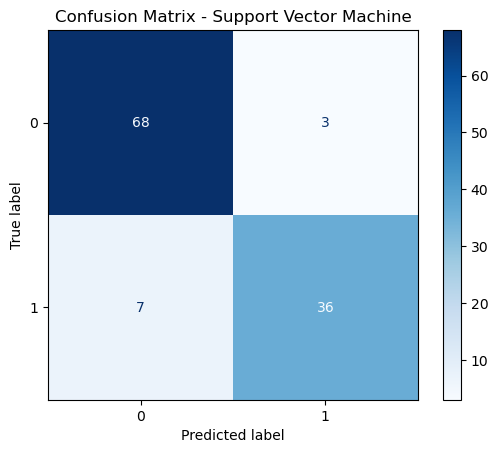

In [24]:
# Support Vector Machine (SVM) fitting and prediction
# In this section, our third and last ML model is trained and tested using the dataset.

# We will use the SVC class from sklearn.svm to create the model
from sklearn.svm import SVC

# Create a Support Vector Machine model
svm = SVC(probability=True, random_state=42) # The kernel is set to 'linear' for a linear decision boundary

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Predict the labels for the test set
# This step is crucial to evaluate the model's performance on unseen data
# The predict method will return the predicted labels for the test set
y_pred_svm = svm.predict(X_test)

# Display the performance of the SVM model
# We will use the classification_report function from sklearn.metrics to evaluate the model's performance
print("Support Vector Machine performance:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Support Vector Machine")
plt.grid(False)
plt.show()


## Model #4 - K-NN Clustering<br>
In this section, we ran a fourth model to add another method

Best k from GridSearchCV: 11
Best score from GridSearchCV: 0.9441092358408468
KNN Performance:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



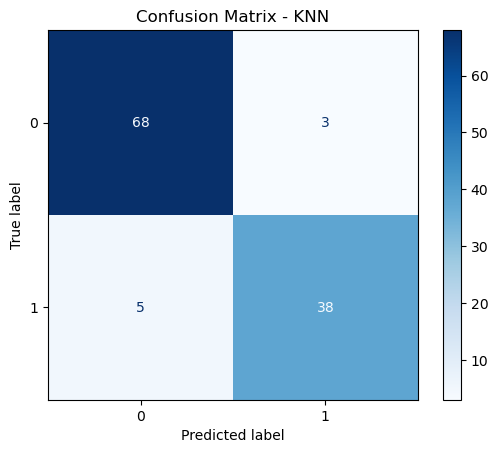

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Find a range of k values to test for KNN - 1 to 20
k_values = list(range(1, 21))

# Set up cross-validation for KNN with 5 folds, scoring by ROC AUC
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': k_values}, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Best k from GridSearchCV: {grid_search.best_params_['n_neighbors']}")
print(f"Best score from GridSearchCV: {grid_search.best_score_}")

# Fit the KNN model with the best k value found by GridSearchCV
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

# Predict the labels for the test set using the trained KNN model
y_pred_knn = knn.predict(X_test)

# Display the performance of the KNN model
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.grid(False)
plt.show()

In [45]:
## Collect the results from three models and Compare the model performance

# Create a list to hold performance metrics
results = []
models = {'Logistic Regression': y_pred_lr,'Random Forest': y_pred_rf,'SVM': y_pred_svm, 'KNN': y_pred_knn}

# Collect performance metrics for each model
for name, y_pred in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1)
    })

performance_df = pd.DataFrame(results)
performance_df = performance_df.round(3)
print(performance_df)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.956      0.952   0.930     0.941
1        Random Forest     0.965      0.953   0.953     0.953
2                  SVM     0.912      0.923   0.837     0.878
3                  KNN     0.930      0.927   0.884     0.905


# Performance Evaluation<br>
We created a performance evaluation criteria to evaluate the 3 models and choose one of them as the best model for the breast cancer Wisconsin project.<br>
The criteria will include the below:<br>
- ROC Curve & AUC Score
- 

### ROC Curve & AUC Score Methods<br>
The receiver operating characteristic (ROC) Curve is an essential visualization representation of the model's performance.<br>
It represents the trade-offs between the true positive rate (TPR) and false positive rate (FPR) at various thresholds. 
<br>It provides insights into how well the model can balance the trade-offs between detecting positive instances and avoiding false positives across these different thresholds.<br>
The perfect model has its TPR of 1.0 and its FPR as 0.0. The closer the model to the perfect model the more accurate it is. <br>
The random guess baseline is shown as AUC=0.5 which means that there is a 50% probability that the model is ranking benign and malignant.

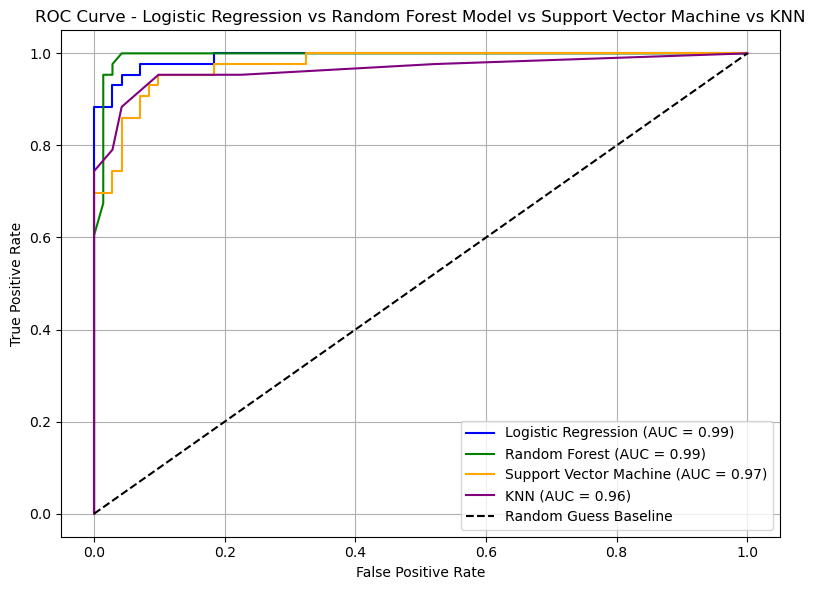

In [46]:
## Create ROC curves for three models and Compare the AUROC of the models
# This step is essential for evaluating the models using ROC curves and AUC scores
# We will use the predict_proba method to get the predicted probabilities for each class
y_prob_lr = lr.predict_proba(X_test)[:, 1] # For Logistic Regression model
y_prob_rf = rf.predict_proba(X_test)[:, 1] # For Random Forest Model
y_prob_svm = svm.predict_proba(X_test)[:, 1]  # For Support Vector Machine
y_prob_knn = knn.predict_proba(X_test)[:, 1]  # For Support Vector Machine

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Compute ROC curve and AUC for Support Vector Machine
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})', color='orange')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='purple')


# Plot random guess line
# This line represents a model that randomly guesses the class labels
# It serves as a baseline for comparison with the other models
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess Baseline')

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression vs Random Forest Model vs Support Vector Machine vs KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Choosing best model

#### Using Cross-Validation<br>

5-Fold CV ROC AUC scores: [0.99582027 0.97755418 0.97832817 0.97781218 0.99638803]
Mean CV ROC AUC: 0.9852

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Test Set ROC AUC: 0.9941


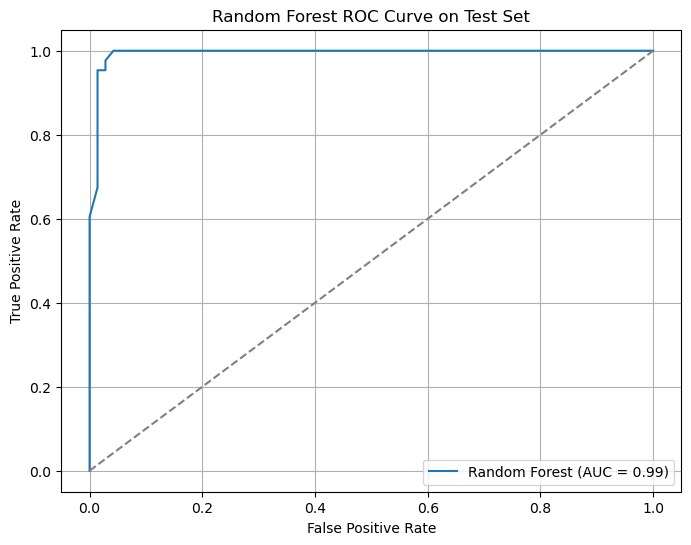

In [47]:
## From above models, Random forest model performed best in the given dataset. 
## So, lets refine and train the model using 5-fold cross validation method
## 5-fold cross validation allows robust estimate of model performance (averages over folds).

# Create the model
rf = RandomForestClassifier(random_state=42)

# 5-fold stratified cross-validation on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')

print(f"5-Fold CV ROC AUC scores: {cv_scores}")
print(f"Mean CV ROC AUC: {np.mean(cv_scores):.4f}")

# Train the model on the full training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Performance on test set
print("\nRandom Forest Test Set Performance:")
print(classification_report(y_test, y_pred))

test_auc = roc_auc_score(y_test, y_prob)
print(f"Test Set ROC AUC: {test_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # or pos_label='M' if labels are strings
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.show()


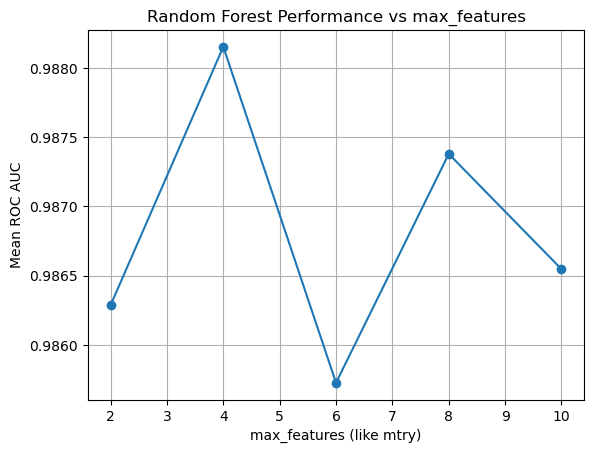

In [34]:
## RF model is the obvious choice here
## lets do some diagnostics for RF
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
# Grid search over 'max_features' (like 'mtry' in R)
param_grid = {'max_features': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5
)
grid_search.fit(X_train, y_train)
# Plot ROC AUC vs max_features
scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_grid['max_features'], scores, marker='o')
plt.xlabel('max_features (like mtry)')
plt.ylabel('Mean ROC AUC')
plt.title('Random Forest Performance vs max_features')
plt.grid(True)
plt.show()

# Top 5 Important Features<br>


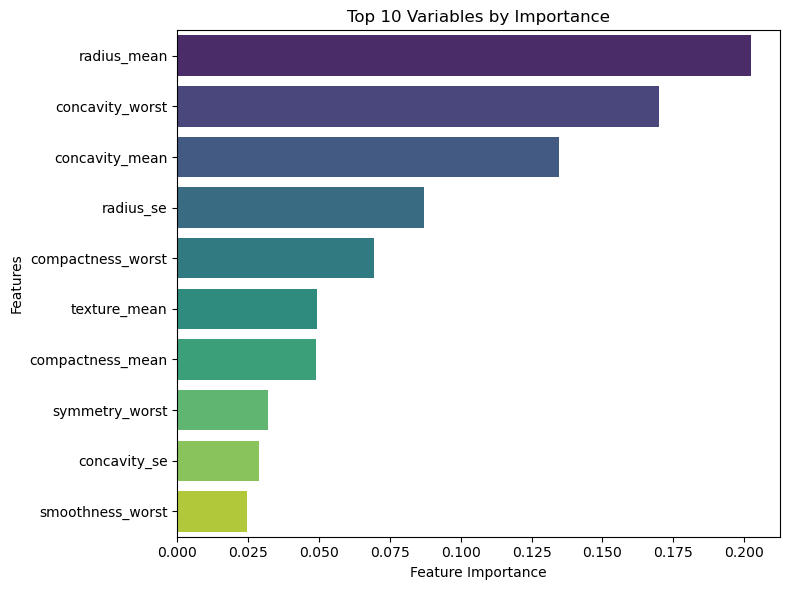

In [54]:
import pandas as pd
import seaborn as sns
# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Top 10 Variables by Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

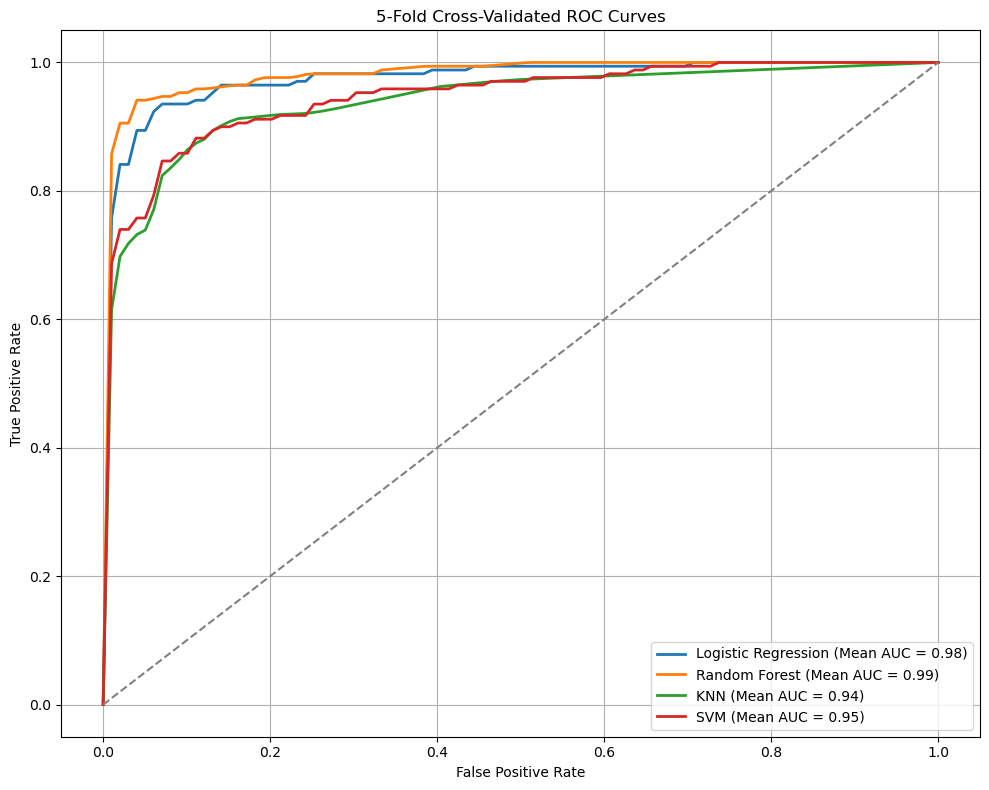

In [49]:
## Compare logistic regression, SVM, and random forest model performance based on 5 fold cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=11),
    'SVM': SVC(probability=True, kernel='rbf', random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for name, model in models.items():
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_cv_train, y_cv_train)
        y_proba = model.predict_proba(X_cv_val)[:, 1]

        fpr, tpr, _ = roc_curve(y_cv_val, y_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2,
             label=f'{name} (Mean AUC = {mean_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5-Fold Cross-Validated ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()
